# Bike Sharing Dataset

**Column Description :**
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

**Dataset Link :**
https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

## 1. Machine Learing

### 1.1. Data Preparation

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Importing Required Score Packages

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [ ]:
# Importing Day and Hour Dataset

df_day=pd.read_csv("/content/drive/MyDrive/Bike Sharing/day.csv")
df_hour=pd.read_csv("/content/drive/MyDrive/Bike Sharing/hour.csv")

In [ ]:
# Viewing Our Datasets - 1

df_day.head()

,instant,dateday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Viewing Our Datasets - 2

df_hour.head()

,instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 1.2. Dataset Merging

In [ ]:
# Changing to Datetime Type

df_day["datetime"]=pd.to_datetime(df_day["dateday"] , format='%d-%m-%Y' , dayfirst=True)
df_hour["datetime"]=pd.to_datetime(df_hour["dateday"] , format='%d-%m-%Y' , dayfirst=True)+pd.to_timedelta(df_hour["hr"] , unit="h")

In [ ]:
# Viewing Our Datasets - 1

df_day.head()

,instant,dateday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05


In [ ]:
# Viewing Our Datasets - 2

df_hour.head()

,instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [ ]:
# Merging the Datasets

df=pd.merge(df_hour , df_day , how="inner" , on="datetime")
df.head()

,instant_x,dateday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,01-01-2011,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,25,02-01-2011,1,0,1,0,0,0,0,2,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,48,03-01-2011,1,0,1,0,0,1,1,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,70,04-01-2011,1,0,1,0,0,2,1,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,93,05-01-2011,1,0,1,0,0,3,1,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Droping Duplicates

df.drop_duplicates(inplace=True)
df.head()

,instant_x,dateday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,01-01-2011,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,25,02-01-2011,1,0,1,0,0,0,0,2,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,48,03-01-2011,1,0,1,0,0,1,1,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,70,04-01-2011,1,0,1,0,0,2,1,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,93,05-01-2011,1,0,1,0,0,3,1,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Droping Duplicates Colums

df=df.drop([col for col in df.columns if col.endswith('_y')], axis=1)
df.head()

,instant_x,dateday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,datetime
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01
1,25,02-01-2011,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17,2011-01-02
2,48,03-01-2011,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5,2011-01-03
3,70,04-01-2011,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5,2011-01-04
4,93,05-01-2011,1,0,1,0,0,3,1,1,0.20,0.2576,0.64,0.0000,0,6,6,2011-01-05


### Merging Not Working

In [ ]:
# Taking Hour Dataset Only

df=pd.read_csv("/content/drive/MyDrive/Bike Sharing/hour.csv")
df.head()

,instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 1.3. EDA (Exploratory Data Analysis)

In [ ]:
# Length of the Dataset

len(df)

17379

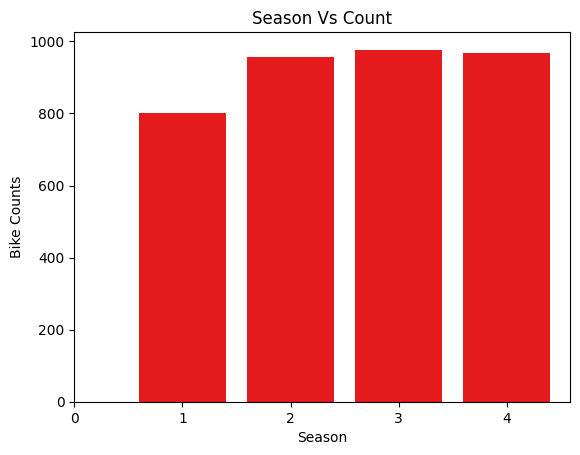

In [ ]:
# Plotting Season Vs Count

colors=sns.color_palette("Set1")
plt.bar(df["season"] , df["cnt"] , color=colors[0]);
plt.title("Season Vs Count");
plt.xlabel("Season");
plt.xticks(np.arange(0, 5, step=1))
plt.ylabel("Bike Counts");
plt.show();

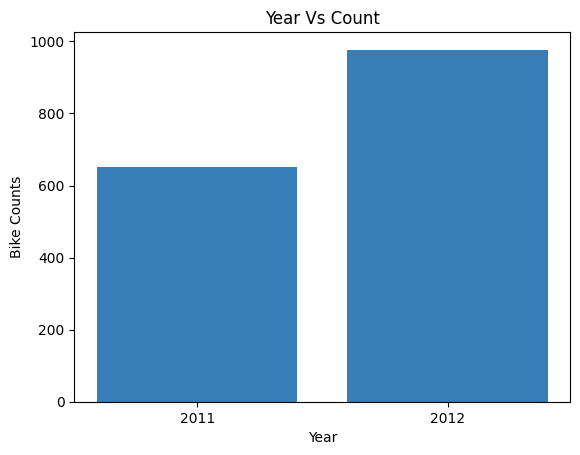

In [ ]:
# Plotting Year Vs Count

plt.bar(df["yr"] , df["cnt"] , color=colors[1]);
plt.title("Year Vs Count");
plt.xlabel("Year");
plt.xticks([0,1],["2011" , "2012"],rotation=0);
plt.ylabel("Bike Counts");
plt.show();

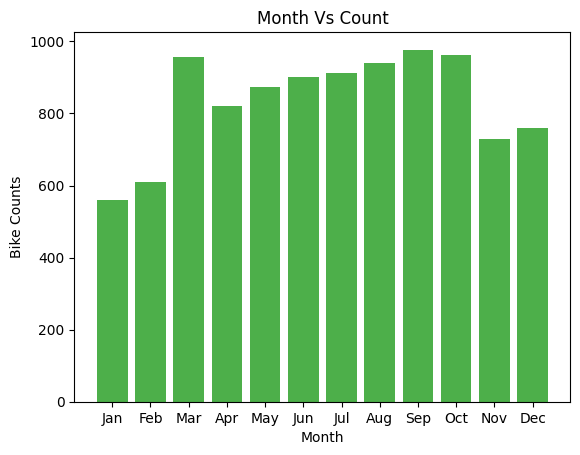

In [ ]:
# Plotting Month Vs Count

plt.bar(df["mnth"] , df["cnt"] , color=colors[2]);
plt.title("Month Vs Count");
plt.xlabel("Month");
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=0);
plt.ylabel("Bike Counts");
plt.show();

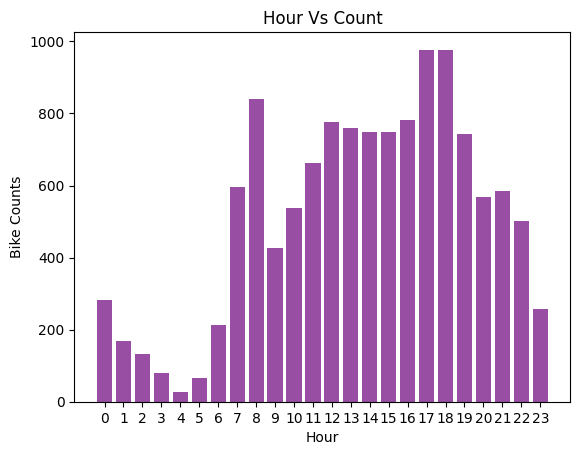

In [ ]:
# Plotting Hour Vs Count

plt.bar(df["hr"] , df["cnt"] , color=colors[3]);
plt.title("Hour Vs Count");
plt.xlabel("Hour");
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel("Bike Counts");
plt.show();

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dateday     17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Finding Missing Values

df.isna().sum()

,0
instant,0
dateday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


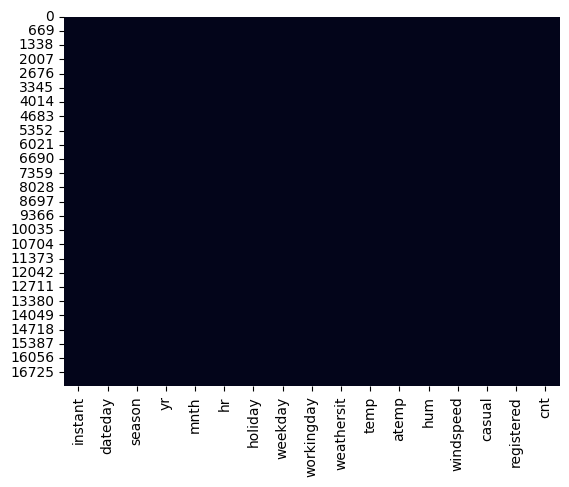

In [ ]:
# Plotting Missing Values

sns.heatmap(df.isnull(), cbar=False);

In [ ]:
# Converting Object into Integer

day=[]
month=[]
year=[]
for i in range(len(df)):
  da,mo,ye=df["dateday"][i].split("-")
  day.append(int(da))
  month.append(int(mo))
  year.append(int(ye))

# Appending into Columns

df["day"]=day
df["month"]=month
df["year"]=year

# Droping Dateday Column

df.drop("dateday" , inplace=True , axis=1)

In [ ]:
# Viewing Our Datasets

df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,1,2011
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,1,2011
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,1,2011
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,1,2011
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,1,2011


In [ ]:
# Correlation Matrix

df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.047372,0.489164,0.866014
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056,-0.003052,0.830386,-0.010742
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495,0.002057,-0.010473,1.000000
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638,0.007929,1.000000,-0.010473
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,0.001538,-0.005772,-0.003867
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.010132,0.018430,0.006692
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002145,0.010400,-0.004485
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,0.008627,-0.003477,-0.002196
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426,-0.003882,0.005400,-0.019157
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,0.027180,0.201691,0.040913


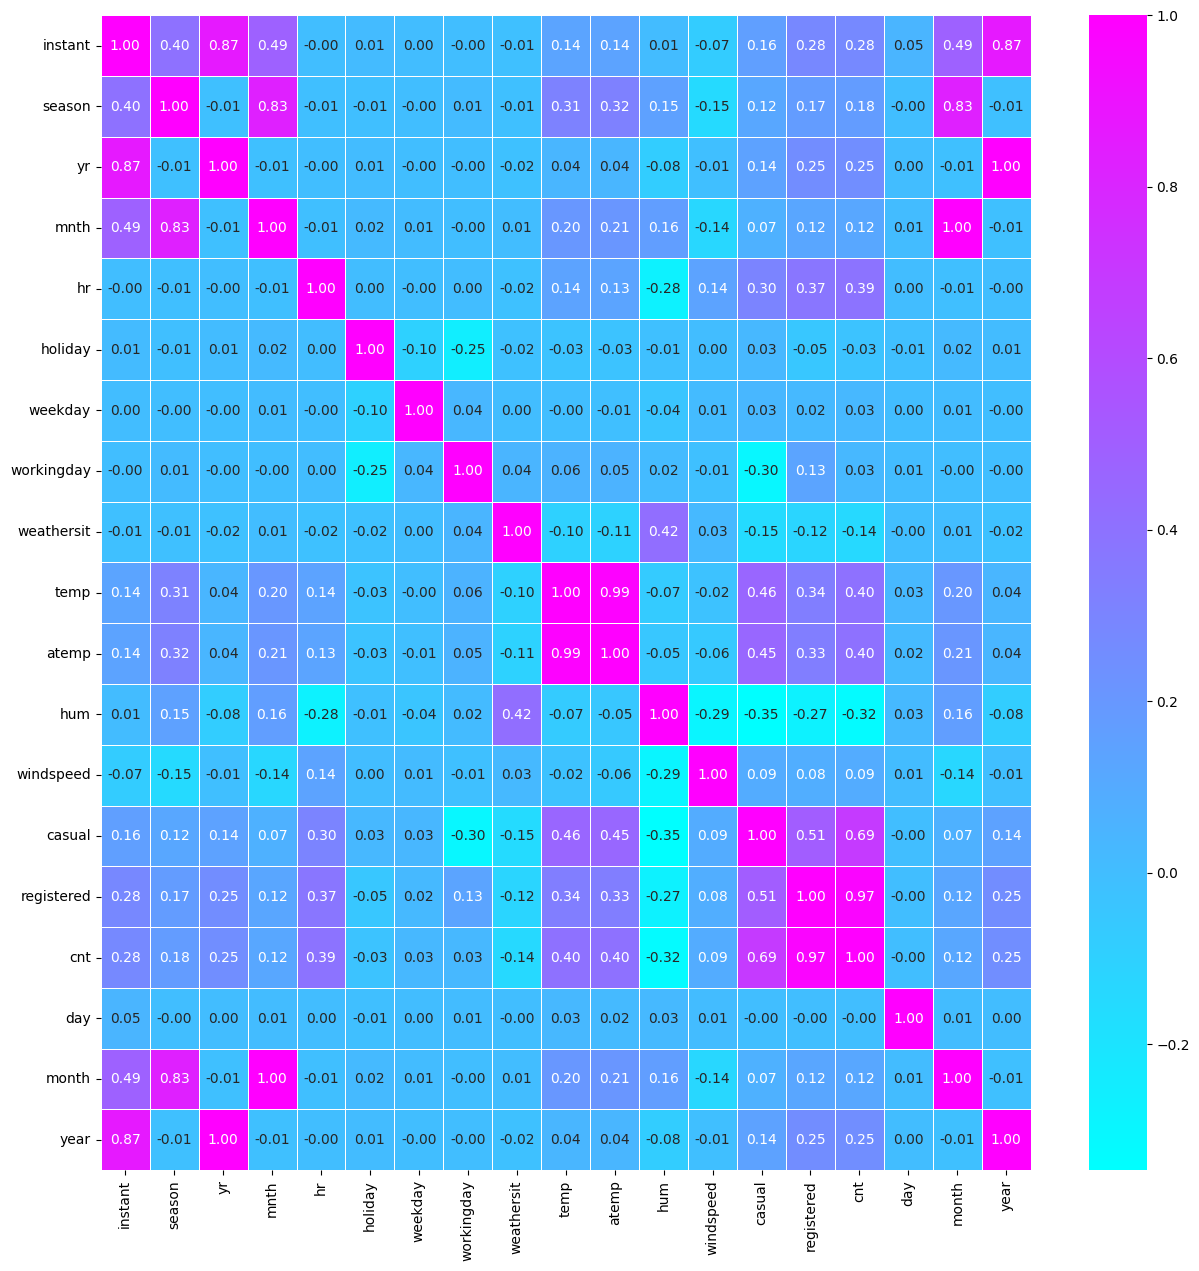

In [ ]:
# Plotting Correlation Matrix using Seaborn

fig , ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(df.corr() , annot=True , linewidth=0.5 , fmt="0.2f" , cmap="cool");

### 1.4. Modelling

In [ ]:
# Splitting our Data into X and Y

X=df.drop("cnt" , axis=1)
Y=df["cnt"]

# Splitting and X and Y into Train and Test Data

np.random.seed(30)
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)
len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

(13903, 3476, 13903, 3476)

#### 1.4.1. Logistic Regression - Modelling

In [ ]:
# Imporing the Model

from sklearn.linear_model import LogisticRegression

# Training and Testing Data
log_model=LogisticRegression()
log_model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

####1.4.2. Random Forest Regression - Modelling

In [ ]:
# Imporing the Model

from sklearn.ensemble import RandomForestRegressor

# Training and Testing Data
ran_model=RandomForestRegressor()
ran_model.fit(X_train , Y_train)

RandomForestRegressor()

####1.4.3. K-Nearest Neighbors Regression - Modelling

In [ ]:
# Imporing the Model

from sklearn.neighbors import KNeighborsRegressor

# Training and Testing Data
knn_model=KNeighborsRegressor()
knn_model.fit(X_train , Y_train)

KNeighborsRegressor()

####1.4.4. Ridge and Lasso - Modelling

In [ ]:
# Imporing the Model

from sklearn.linear_model import Ridge , Lasso

# Training and Testing Data
rid_model=Ridge()
las_model=Lasso()
rid_model.fit(X_train , Y_train) , las_model.fit(X_train , Y_train)

(Ridge(), Lasso())

####1.4.5. Decision Tree Regression - Modelling

In [ ]:
# Imporing the Model

from sklearn.tree import DecisionTreeRegressor

# Training and Testing Data
dec_model=DecisionTreeRegressor()
dec_model.fit(X_train , Y_train)

DecisionTreeRegressor()

### 1.5. Predicting the Target Value

#### 1.5.1. Linear Regression - Predicting

In [ ]:
# Predicting Value

log_pre=pd.Series(lin_model.predict(X_test))
log_pre.head()

,0
0,1
1,1
2,398
3,1
4,8


####1.5.2. Random Forest Regression - Predicting

In [ ]:
# Predicting Value

ran_pre=pd.Series(ran_model.predict(X_test))
ran_pre.head()

,0
0,207.50
1,2.00
2,440.80
3,212.87
4,158.72


####1.5.3. K-Nearest Neighbors Regression - Predicting

In [ ]:
# Predicting Value

knn_pre=pd.Series(knn_model.predict(X_test))
knn_pre.head()

,0
0,207.0
1,4.2
2,478.4
3,218.2
4,173.0


####1.5.4. Ridge and Lasso - Predicting

In [ ]:
# Predicting Value

rid_pre=pd.Series(rid_model.predict(X_test))
las_pre=pd.Series(las_model.predict(X_test))
rid_pre.head() , las_pre.head()

(0    208.000000
 1      2.000000
 2    440.000000
 3    213.000001
 4    158.000000
 dtype: float64,
 0    207.981351
 1      2.008979
 2    440.010958
 3    213.001538
 4    158.017490
 dtype: float64)

####1.5.5. Decisin Tree Regression - Predicting

In [ ]:
# Predicting Value

dec_pre=pd.Series(dec_model.predict(X_test))
dec_pre.head()

,0
0,203.0
1,2.0
2,441.0
3,215.0
4,162.0


###1.6. Evaluating

####1.6.1. Linear Regression - Evaluating

In [ ]:
# Tested Score

r2_log=r2_score(lin_pre , Y_test)
mae_log=mean_absolute_error(lin_pre , Y_test)
mse_log=mean_squared_error(lin_pre , Y_test)
r2_log , mae_log , mse_log

(-0.9205999658891248, 126.7054085155351, 26461.352128883773)

####1.6.2. Random Forest Regression - Evaluating

In [ ]:
# Tested Score

r2_ran=r2_score(ran_pre , Y_test)
mae_ran=mean_absolute_error(ran_pre , Y_test)
mse_ran=mean_squared_error(ran_pre , Y_test)
r2_ran , mae_ran , mse_ran

(0.9998279043098107, 0.9394620253164556, 5.448595540851553)

####1.6.3. K-Nearest Neighbors Regression - Evaluating

In [ ]:
# Tested Score

r2_knn=r2_score(knn_pre , Y_test)
mae_knn=mean_absolute_error(knn_pre , Y_test)
mse_knn=mean_squared_error(knn_pre , Y_test)
r2_knn , mae_knn , mse_knn

(0.99130359821459, 10.952013808975833, 268.5571921749137)

####1.6.4. Ridge and Lasso - Evaluating

In [ ]:
# Tested Score

r2_rid=r2_score(rid_pre , Y_test)
mae_rid=mean_absolute_error(rid_pre , Y_test)
mse_rid=mean_squared_error(rid_pre , Y_test)
r2_las=r2_score(las_pre , Y_test)
mae_las=mean_absolute_error(las_pre , Y_test)
mse_las=mean_squared_error(las_pre , Y_test)
r2_rid , mae_rid , mse_rid , r2_las , mae_las , mse_las

(0.9999999999999999,
 1.3154192857041045e-06,
 3.793627062318139e-12,
 0.9999999854220003,
 0.014400440123178966,
 0.00046249755347143527)

####1.6.5. Decision Tree Regression - Evaluating

In [ ]:
# Tested Score

r2_dec=r2_score(dec_pre , Y_test)
mae_dec=mean_absolute_error(dec_pre , Y_test)
mse_dec=mean_squared_error(dec_pre , Y_test)
r2_dec , mae_dec , mse_dec

(0.999157281815542, 2.3837744533947065, 26.73187571921749)

In [ ]:
# Creating Dictionary for R2 Score

r2_sco={"Logistic Regression" : round(r2_log*100,2) , "Random Forest Regression" : round(r2_ran*100,2) , "KNN Neighbour Regression" : round(r2_knn*100,2) , "Ridge" : round(r2_rid*100,2) , "Lasso" : round(r2_las*100,2) , "Decision Tree Regression" : round(r2_dec*100,2)}
r2_sco

{'Logistic Regression': -92.06,
 'Random Forest Regression': 99.98,
 'KNN Neighbour Regression': 99.13,
 'Ridge': 100.0,
 'Lasso': 100.0,
 'Decision Tree Regression': 99.92}

In [ ]:
# Creating DataFrame

r2_sco_df=pd.DataFrame(r2_sco , index=["Accuracy"])
r2_sco_df

,Logistic Regression,Random Forest Regression,KNN Neighbour Regression,Ridge,Lasso,Decision Tree Regression
Accuracy,-92.06,99.98,99.13,100.0,100.0,99.92


In [ ]:
# Droping the Logistic Regression due to Negative R2 Score

del r2_sco["Logistic Regression"]
del r2_sco_df["Logistic Regression"]
r2_sco

{'Random Forest Regression': 99.98,
 'KNN Neighbour Regression': 99.13,
 'Ridge': 100.0,
 'Lasso': 100.0,
 'Decision Tree Regression': 99.92}

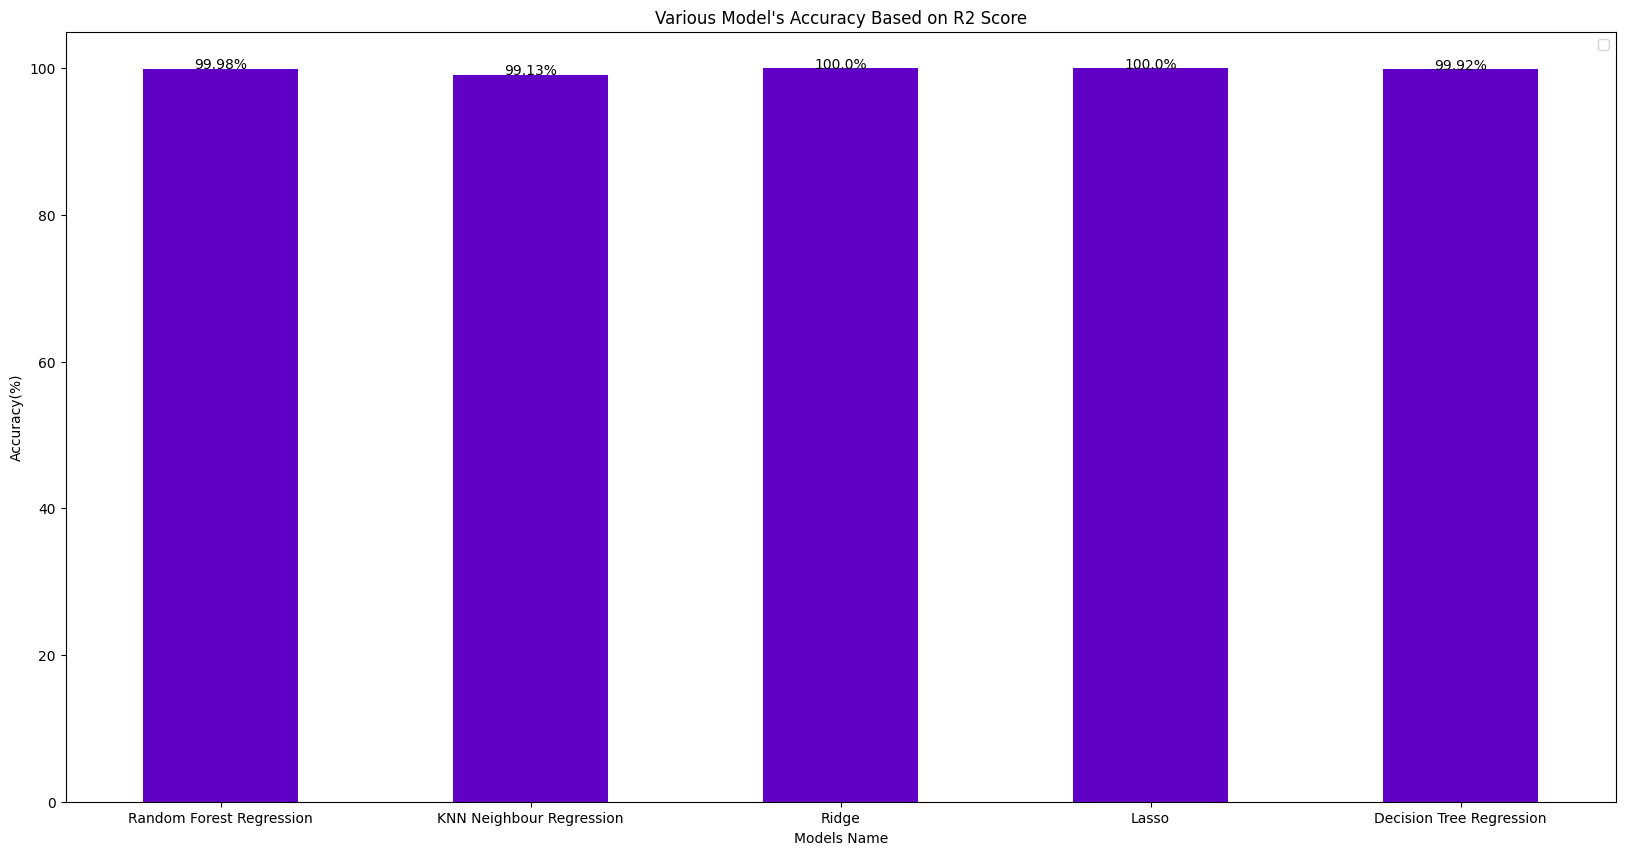

In [ ]:
# Plotting the Various Models Performance based on R2 Score

colors=sns.color_palette(palette='gnuplot')
r2_sco_df.T.plot(kind="bar",color=colors[0],figsize=(20,10));
plt.xlabel("Models Name");
plt.ylabel("Accuracy(%)");
plt.title("Various Model's Accuracy Based on R2 Score")
plt.xticks(rotation=0);
plt.legend("");
i=0
for j in r2_sco_df.values():
    plt.text(i,j,f"{j}%",ha="center");
    i+=1

##2.Deep Learning

###2.1. Data Preparation

In [ ]:
# Importing Required Modules

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

###2.4. Modelling

In [ ]:
# Importing the Standard Scaler for Standizing the Features

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Making the Features as Standarized

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
# Importing the Models Library

from tf_keras import models , layers , regularizers

# Building a Model

model = models.Sequential()

# Adding Input Layer

model.add(layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization()) # Normalising the Output of the Previos Layer
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting

# Adding Hidden Layer

model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization()) # Normalising the Output of the Previos Layer
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting

# Adding Output Layer

model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model

model.compile(loss="mse",optimizer=tf.keras.optimizers.RMSprop(),metrics=["mse"])

# Early stopping to prevent overfitting

early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Train the model using the scaled training data

model1=model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on scaled test data

val_loss, val_acc = model.evaluate(X_test_scaled, Y_test)
print(f"Validation Loss : {val_loss} , Validation Accuracy : {val_acc}")

Epoch 1/100
348/348 [==============================] - 9s 9ms/step - loss: -4586.1899 - accuracy: 1.7982e-04 - val_loss: -8763.3506 - val_accuracy: 0.0000e+00
Epoch 2/100
348/348 [==============================] - 2s 6ms/step - loss: -20327.9492 - accuracy: 2.6974e-04 - val_loss: -30855.0371 - val_accuracy: 0.0000e+00
Epoch 3/100
348/348 [==============================] - 2s 6ms/step - loss: -46680.6875 - accuracy: 1.7982e-04 - val_loss: -62511.6445 - val_accuracy: 0.0000e+00
Epoch 4/100
348/348 [==============================] - 2s 6ms/step - loss: -83125.7109 - accuracy: 3.5965e-04 - val_loss: -104401.8359 - val_accuracy: 0.0000e+00
Epoch 5/100
348/348 [==============================] - 2s 6ms/step - loss: -129452.1484 - accuracy: 9.8903e-04 - val_loss: -155011.7031 - val_accuracy: 0.0000e+00
Epoch 6/100
348/348 [==============================] - 3s 8ms/step - loss: -183060.9688 - accuracy: 0.0015 - val_loss: -217591.7344 - val_accuracy: 0.0000e+00
Epoch 7/100
348/348 [==============

### 2.5. Predicting

In [ ]:
# Predicting the Count Value

pre_val=model.predict(X_test)
pre_val[:5]

109/109 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

### 2.6. Evaluating

In [ ]:
# Evaluating the Predicted Value

mod_r2=r2_score(pre_val,Y_test)
mod_mae=mean_absolute_error(pre_val,Y_test)
mod_mse=mean_squared_error(pre_val,Y_test)

print(f"R2 Score : {mod_r2}\nMAE : {mod_mae}\nMSE : {mod_mse}")

R2 Score : 0.0
MAE : 185.49309551208285
MSE : 66137.46490218642


### Modelling Using MLP Regressor

In [ ]:
# Importing MLP Regressor

from sklearn.neural_network import MLPRegressor

# Fitting the Model

mlp_model=MLPRegressor()
mlp_model.fit(X_train , Y_train)

# Predicting the Value

mlp_pre=mlp_model.predict(X_test_scaled)

# Evaluating the Predicted Data

r2_mlp=r2_score(Y_test,mlp_pre)
mae_mlp=mean_absolute_error(Y_test,mlp_pre)
mse_mlp=mean_squared_error(Y_test,mlp_pre)
print(f"R2 Score : {r2_mlp}\nMAE : {mae_mlp}\nMSE : {mse_mlp}")

R2 Score : 0.9999921028764037
MAE : 0.34596899266615017
MSE : 0.2505739660687223
